In [ ]:
from zipfile import ZipFile
from pandas import *

dz= ZipFile("/content/archive.zip")

data = read_csv(dz.open("online_retail.csv"), low_memory = False)
data1 = data.copy()

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
((data.isnull().sum()) / data.shape[0]) * 100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.268311
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,24.926694
Country,0.000000


In [ ]:
#data cleaning
data.dropna(subset = ['CustomerID'])
data = data[data['Quantity'] > 0]
data['InvoiceDate'] = to_datetime(data['InvoiceDate'])

<ipython-input-44-3bf0e3cb9df4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = to_datetime(data['InvoiceDate'])


In [ ]:
data['TotalSpend'] = data['Quantity'] * data['UnitPrice']

<ipython-input-45-fd82cc7ed6e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalSpend'] = data['Quantity'] * data['UnitPrice']


In [ ]:
((data.isnull().sum()) / data.shape[0]) * 100

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.111428
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,25.101593
Country,0.000000
TotalSpend,0.000000


In [ ]:
customer_data = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'TotalSpend': 'sum',  # Total spend
    'InvoiceNo': 'count'  # Frequency of purchases
}).reset_index()

In [ ]:
customer_data.columns = ['CustomerID', 'Recency', 'TotalSpend', 'Frequency']

In [ ]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
feat= sc.fit_transform(customer_data[['CustomerID', 'Recency', 'TotalSpend', 'Frequency']])

In [ ]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=4, random_state= 42)
customer_data['Cluster'] = k.fit_predict(feat)

print(k.cluster_centers_)

[[ 0.61905188 -0.65026719 -0.14809411 -0.22544254]
 [-1.1692634   1.19930436  0.16764477  0.33401861]
 [ 2.40586229  1.4814088  21.00870177  3.21779933]
 [ 2.40586229  1.41323936  7.43723557 21.98875982]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


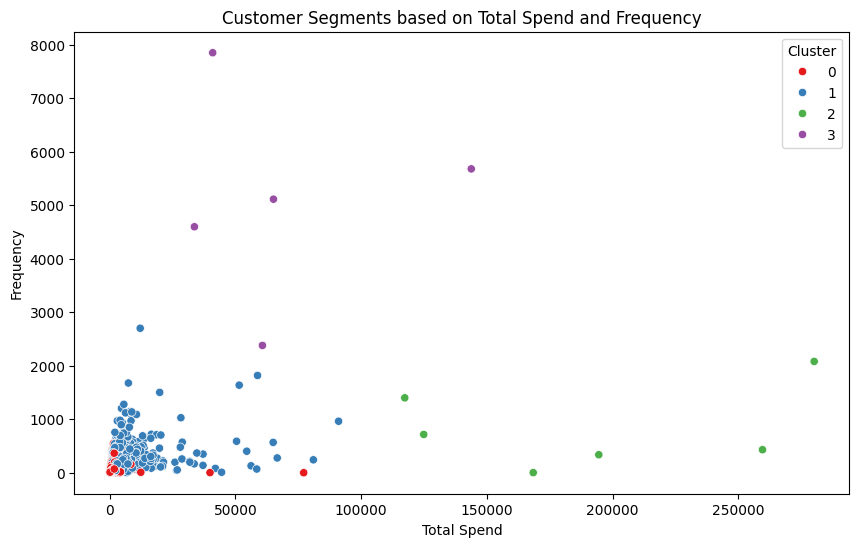

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.scatterplot(data=customer_data,x='TotalSpend', y='Frequency',\
                hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Total Spend and Frequency')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

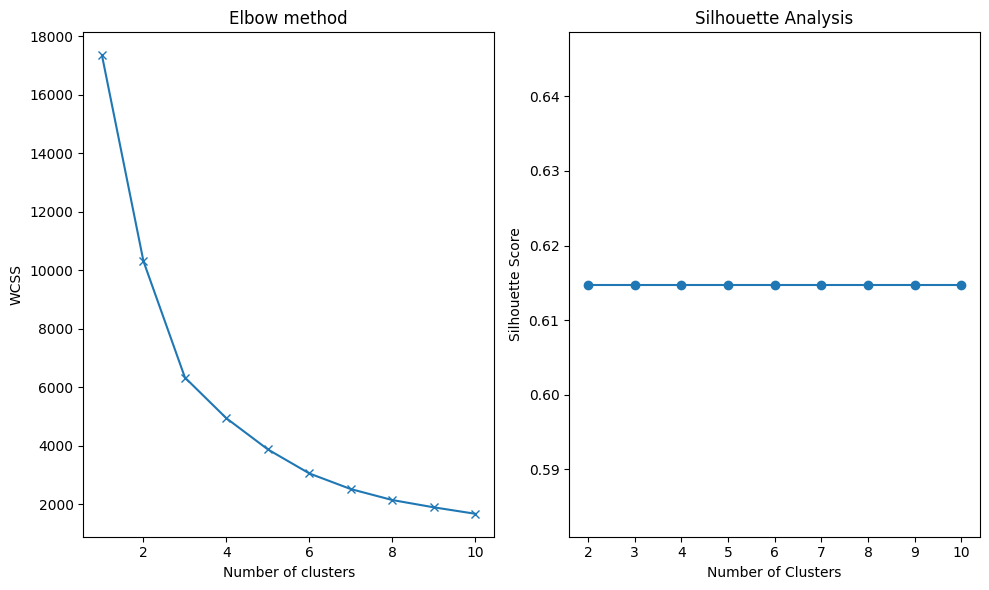

In [ ]:
# Elbow method

wcss = [ ]
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state = 42)
  kmeans.fit(feat)
  wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker = 'x')
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

#Silhouette Analysis
from sklearn.metrics import silhouette_score
silhouette_scores = [ ]
for k in range(2, 11):
  k_mean = KMeans(n_clusters= i, random_state = 42)
  clusters = k_mean.fit_predict(feat)
  score = silhouette_score(feat, clusters)
  silhouette_scores.append(score)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
#After tuning

from sklearn.cluster import KMeans

k = KMeans(n_clusters = 10, random_state= 42)
customer_data['Cluster'] = k.fit_predict(feat)

print(k.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[-1.00221063e-02  1.43160513e-01 -7.51662719e-02 -1.23343954e-01]
 [-1.21796430e+00  1.16253666e+00  1.48666166e-02  7.93122567e-02]
 [ 1.37048326e+00  1.72487108e+00  7.98368738e+00  6.85105297e+00]
 [ 2.40586229e+00  1.30719801e+00  7.66327645e+00  2.49863580e+01]
 [ 1.19792009e+00 -9.18502915e-01 -1.78163438e-01 -2.67675984e-01]
 [-1.00221063e-02 -9.06726582e-01 -1.66921943e-01 -2.63163857e-01]
 [ 2.40586229e+00  1.43974969e+00  2.48873450e+01  2.71473905e+00]
 [-1.21796430e+00  1.48133931e+00  5.49949431e-01  1.68475362e+00]
 [-1.11292585e+00  1.35066837e+00  4.64693732e+00  6.28075459e-01]
 [ 1.19792009e+00  1.03072693e-01 -1.10398161e-01 -9.38017147e-02]]


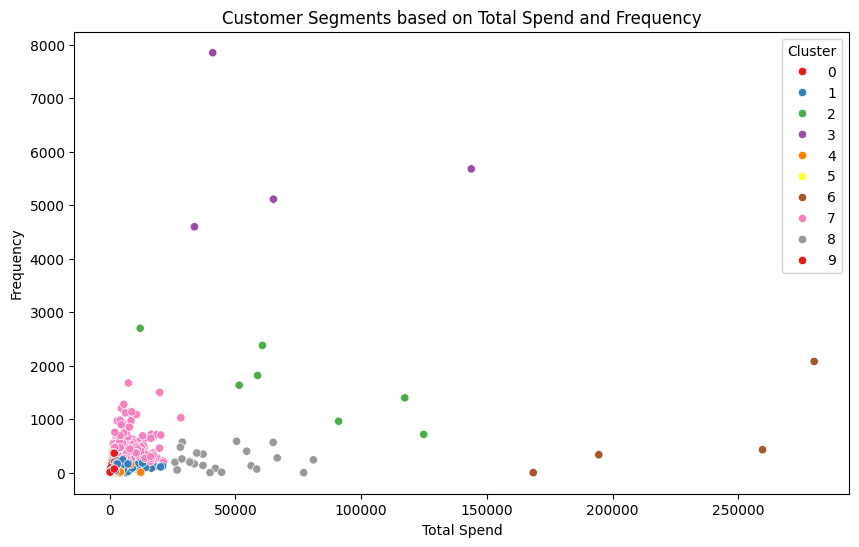

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.scatterplot(data=customer_data,x='TotalSpend', y='Frequency',\
                hue='Cluster', palette='Set1')
plt.title('Customer Segments based on Total Spend and Frequency')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()